In [1]:
import numpy as np
from trackhhl.toy import simple_generator as toy
from trackhhl.hamiltonians import simple_hamiltonian as hamiltonian
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def cartesian_to_spherical_vectorized(cartesian_coords, translation=(0, 0, 0)):
    x, y, z = cartesian_coords[:, 0] - translation[0], cartesian_coords[:, 1] - translation[1], cartesian_coords[:, 2] - translation[2]
    r = np.sqrt(x**2 + y**2 + z**2)
    phi = np.arctan2(y, x)
    theta = np.arccos(z / r)
    return r, theta, phi

def calc_phi(cartesian_coords):
    x, y, _ = cartesian_coords[:, 0], cartesian_coords[:, 1], cartesian_coords[:, 2]
    phi = np.arctan2(y, x)
    return phi

In [3]:
N_MODULES = 5
LX = float("+inf")
LY = float("+inf")
Z_SPACING = 1.0

detector = toy.SimpleDetectorGeometry(
    module_id=list(range(N_MODULES)),
    lx=[LX]*N_MODULES,
    ly=[LY]*N_MODULES,
    z=[i+Z_SPACING for i in range(N_MODULES)]
)

generator = toy.SimpleGenerator(
    detector_geometry=detector,
    theta_max=np.pi/6
)

N_PARTICLES = 5
N_EVENTS = 2
SIGMA = (0,0,0.5)
events = generator.generate_event(N_PARTICLES, N_EVENTS, SIGMA)
event = events[0]


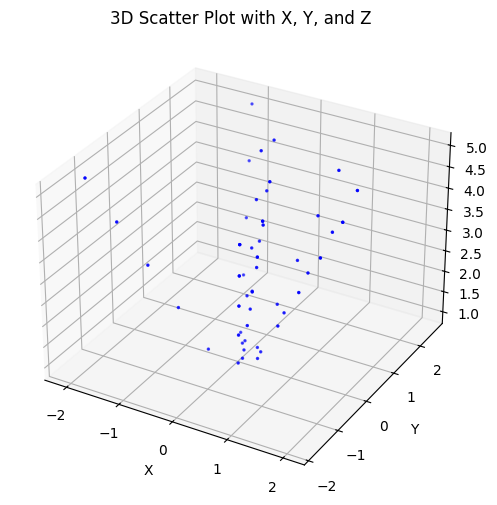

In [4]:
event_hits = []
events_store = []
for event_ in events:
    for hit in event_.hits:
        event_hits.append([hit.x,hit.y,hit.z,hit.track_id])
    events_store.append(event_hits)
structured_array = np.array(events_store)
cartesian_coords = structured_array[:, :, :3]  
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
for structured_array_ in structured_array:
    ax.scatter(structured_array_[:,0], structured_array_[:,1], structured_array_[:,2], c='b', marker='o', s=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Scatter Plot with X, Y, and Z')
plt.show()

In [5]:

cartesian_list = cartesian_coords[0].tolist()

phi = calc_phi(cartesian_coords[0])
for i in range(len(cartesian_coords[0,:])):
    cartesian_list[i].append(phi[i])
cartesian_list = np.array(cartesian_list)
phi_value = 0.70
phi_range_mask = np.logical_and(phi >= phi_value - 0.3, phi <= phi_value + 0.3)
selected_points = cartesian_list[phi_range_mask]
sorted_indices = np.argsort(selected_points[:, 3])
selected_points = selected_points[sorted_indices]

print(selected_points)

[[0.09306561 0.04429767 1.         0.44425024]
 [0.18613123 0.08859534 2.         0.44425024]
 [0.27919684 0.13289301 3.         0.44425024]
 [0.37226246 0.17719068 4.         0.44425024]
 [0.46532807 0.22148835 5.         0.44425024]
 [0.24511773 0.22684072 1.         0.74669162]
 [0.49023546 0.45368144 2.         0.74669162]
 [0.73535319 0.68052216 3.         0.74669162]
 [0.98047092 0.90736288 4.         0.74669162]
 [1.22558865 1.13420361 5.         0.74669162]]


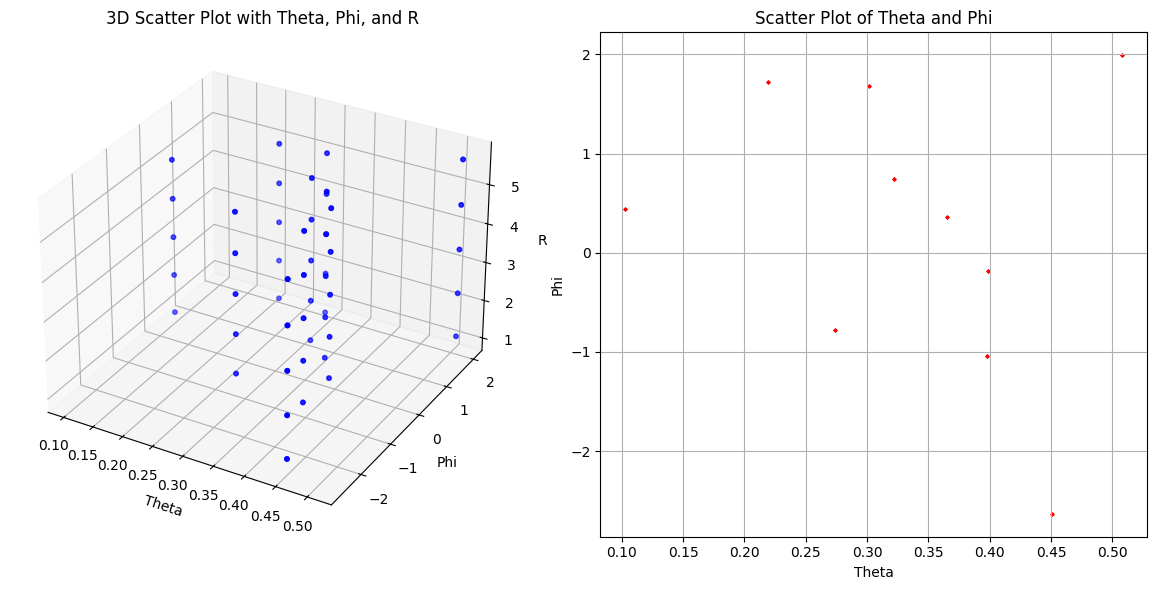

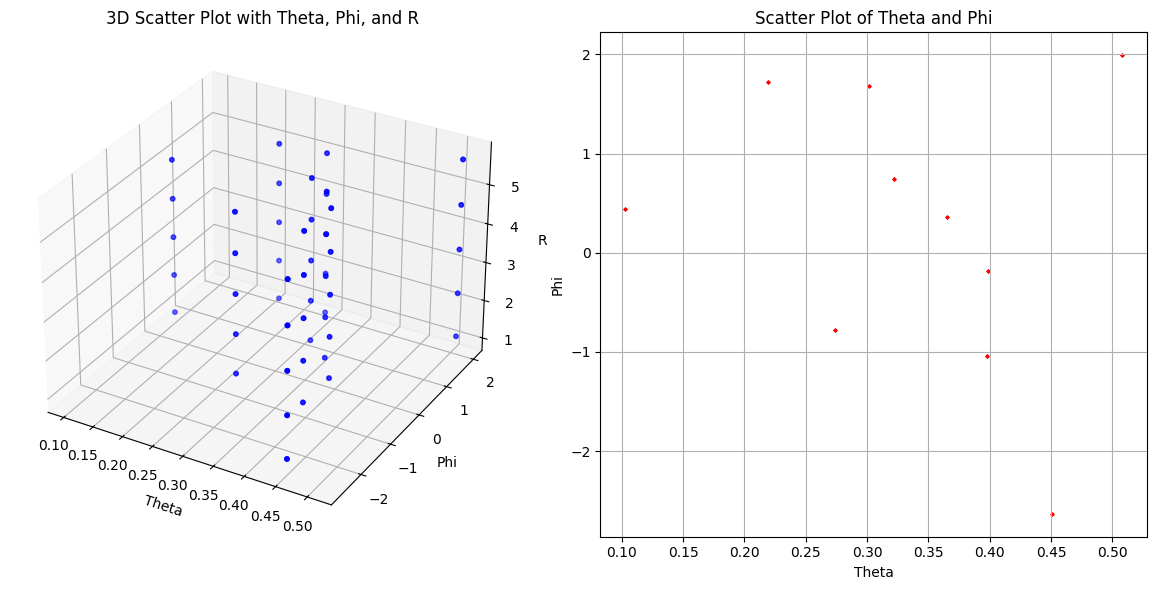

In [6]:

for vert in generator.primary_vertices:
    r = []
    theta = []
    phi = []
    for coord in cartesian_coords:
        r_, thetas_, phi_ = cartesian_to_spherical_vectorized(coord, vert)
        r.append(r_)
        theta.append(thetas_)
        phi.append(phi_)

    fig = plt.figure(figsize=(18, 6))

    # Plot the 3D scatter plot with Theta, Phi, and R
    ax1 = fig.add_subplot(131, projection='3d')
    for i in range(len(r)):
        ax1.scatter(theta[i], phi[i], r[i], c='b', marker='o', s=10)  
    ax1.set_xlabel('Theta')
    ax1.set_ylabel('Phi')
    ax1.set_zlabel('R')
    ax1.set_title('3D Scatter Plot with Theta, Phi, and R')

    # Create a scatter plot with just Theta and Phi
    ax2 = fig.add_subplot(132)
    for i in range(len(theta)):
        ax2.scatter(theta[i], phi[i], c='r', marker='o', s=2)  
    ax2.set_xlabel('Theta')
    ax2.set_ylabel('Phi')
    ax2.set_title('Scatter Plot of Theta and Phi')

    plt.grid()
    plt.tight_layout()  # Ensures proper spacing between subplots
    plt.show()


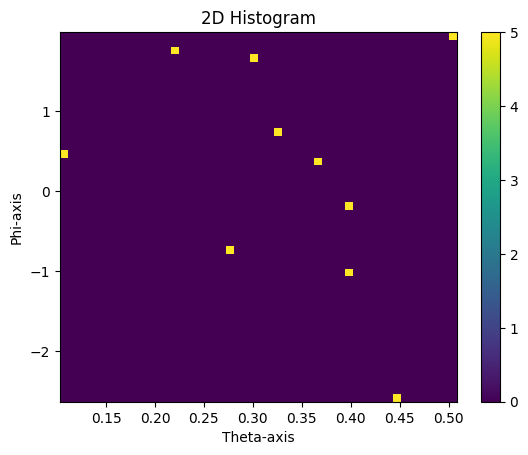

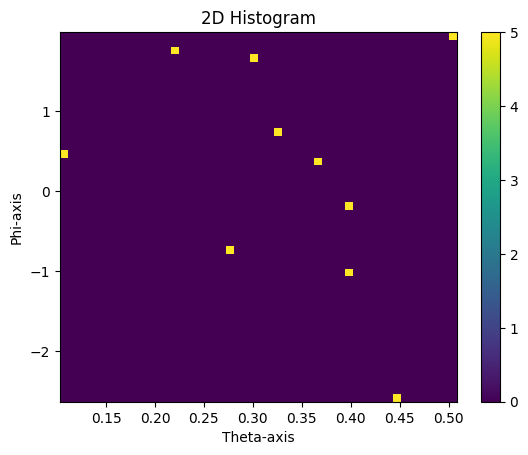

In [13]:
hist = []
theta_axis = []
phi_axis = []
bins = (50,50)
for i, vert in enumerate(generator.primary_vertices):
   
    r, theta, phi = cartesian_to_spherical_vectorized(cartesian_coords[i], vert)

    
    plt.hist2d(theta, phi, bins=bins, cmap='viridis')
    hist.append(np.histogram2d(theta, phi, bins=bins)[0])
    theta_axis.append(np.histogram2d(theta, phi, bins=bins)[1])
    phi_axis.append(np.histogram2d(theta, phi, bins=bins)[2])

    plt.colorbar()
    plt.xlabel('Theta-axis')
    plt.ylabel('Phi-axis')
    plt.title('2D Histogram')
    plt.show()

In [8]:
histograms = hist

theta_axis
phi_axis

data_with_histogram_info = []
for i, histogram in enumerate(histograms):
    x_indices, y_indices = np.where(histogram >= 6)
    histogram_indices = np.full((len(x_indices),3), generator.primary_vertices[i])
    data_points = np.column_stack((theta_axis[i][x_indices], phi_axis[i][y_indices], histogram_indices))
    data_with_histogram_info.append(data_points)
final_data = np.vstack(data_with_histogram_info)
print(len(final_data))

0


In [9]:
theta_phi = []

for vert in generator.primary_vertices:
    r = []
    theta = []
    phi = []
    
    for coord in cartesian_coords:
        
        r_, thetas_, phi_ = cartesian_to_spherical_vectorized(coord, vert)
        theta.append(thetas_)
        phi.append(phi_)
    
    theta = np.array(theta)
    theta = np.sum(theta, axis=0)
    phi = np.array(phi)
    phi = np.sum(phi, axis=0)

    
    hist, x_edges, y_edges = np.histogram2d(theta, phi, bins=(200, 200))
    
    x_indices, y_indices = np.where(hist > 2)
    
    for x, y in zip(x_indices, y_indices):
        theta_phi.append((x_edges[x] + (x_edges[x + 1] - x_edges[x]) / 2, y_edges[y] + (y_edges[y + 1] - y_edges[y]) / 2))

theta_phi

[(0.20744295097624474, 0.9088130343184431),
 (0.438595968212229, 3.452195160973499),
 (0.5480895026924322, -1.5420824695491568),
 (0.6048639279784633, 3.3597085381860428),
 (0.645417088897057, 1.509976082436911),
 (0.7305787268261039, 0.7238397887435295),
 (0.7954637842958538, -2.0970022062738964),
 (0.7995191003877131, -0.38599968470594925),
 (0.9009020026841976, -5.24154738104742),
 (1.01445085325626, 3.96087158630451),
 (0.20744295097624474, 0.9088130343184431),
 (0.438595968212229, 3.452195160973499),
 (0.5480895026924322, -1.5420824695491568),
 (0.6048639279784633, 3.3597085381860428),
 (0.645417088897057, 1.509976082436911),
 (0.7305787268261039, 0.7238397887435295),
 (0.7954637842958538, -2.0970022062738964),
 (0.7995191003877131, -0.38599968470594925),
 (0.9009020026841976, -5.24154738104742),
 (1.01445085325626, 3.96087158630451)]

# PCA Emmbeding

In [10]:
x_coords = [hit.x for hit in events.hits]
y_coords = [hit.y for hit in events.hits]
z_coords = [hit.z for hit in events.hits]


point_cloud = np.array([x_coords, y_coords, z_coords]).T

AttributeError: 'list' object has no attribute 'hits'

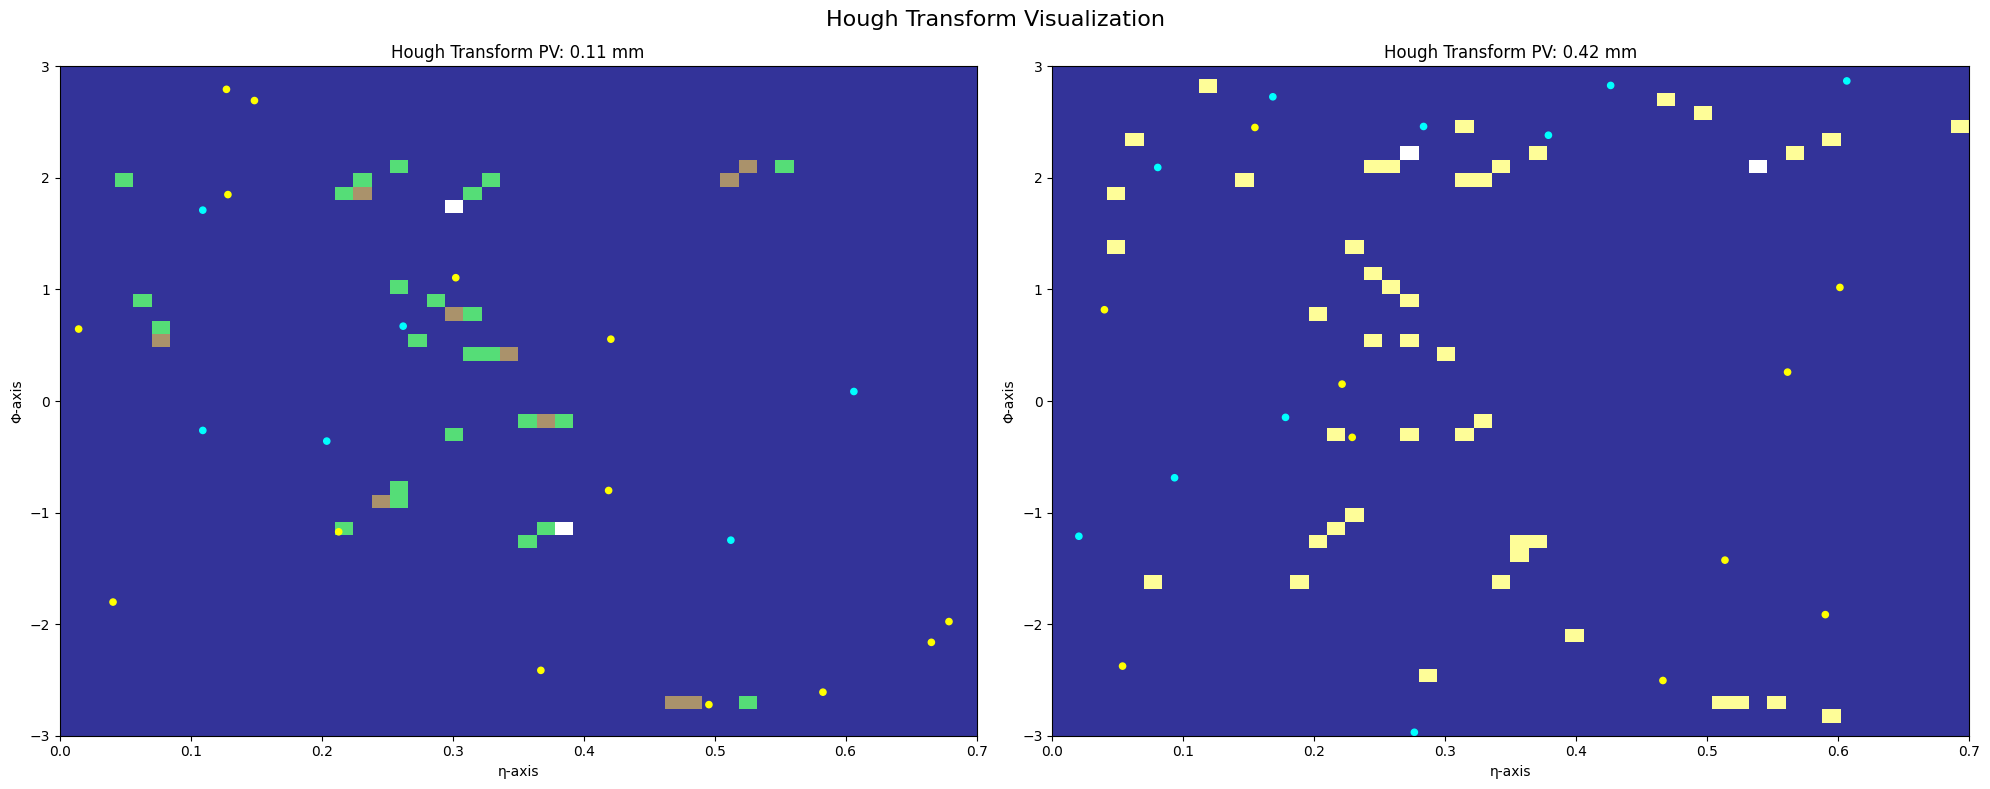

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def hough_transform(cartesian_coords, pv):
    r, theta, phi = cartesian_to_spherical_vectorized(cartesian_coords, pv)
    return theta, phi

# Create a new cell and add this code
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Hough Transform Visualization', fontsize=16)

pvs = [0.11, 0.42]  # Primary vertex positions
colors = ['#00FFFF', '#FFFF00']  # Cyan and Yellow

for idx, (ax, pv) in enumerate(zip([ax1, ax2], pvs)):
    theta_all, phi_all = [], []
    
    for event_coords in cartesian_coords:
        theta, phi = hough_transform(event_coords, (pv, 0, 0))
        theta_all.extend(theta)
        phi_all.extend(phi)
    
    hist, xedges, yedges = np.histogram2d(theta_all, phi_all, bins=(50, 50), range=[[0, 0.7], [-3, 3]])
    
    ax.imshow(hist.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
              origin='lower', aspect='auto', cmap='terrain')
    
    # Add some random points to simulate the yellow and cyan dots
    np.random.seed(42 + idx)  # For reproducibility
    n_points = 20
    random_theta = np.random.uniform(0, 0.7, n_points)
    random_phi = np.random.uniform(-3, 3, n_points)
    random_colors = np.random.choice(colors, n_points)
    
    ax.scatter(random_theta, random_phi, c=random_colors, s=20)
    
    ax.set_xlabel('η-axis')
    ax.set_ylabel('Φ-axis')
    ax.set_title(f'Hough Transform PV: {pv} mm')

plt.tight_layout()
plt.show()

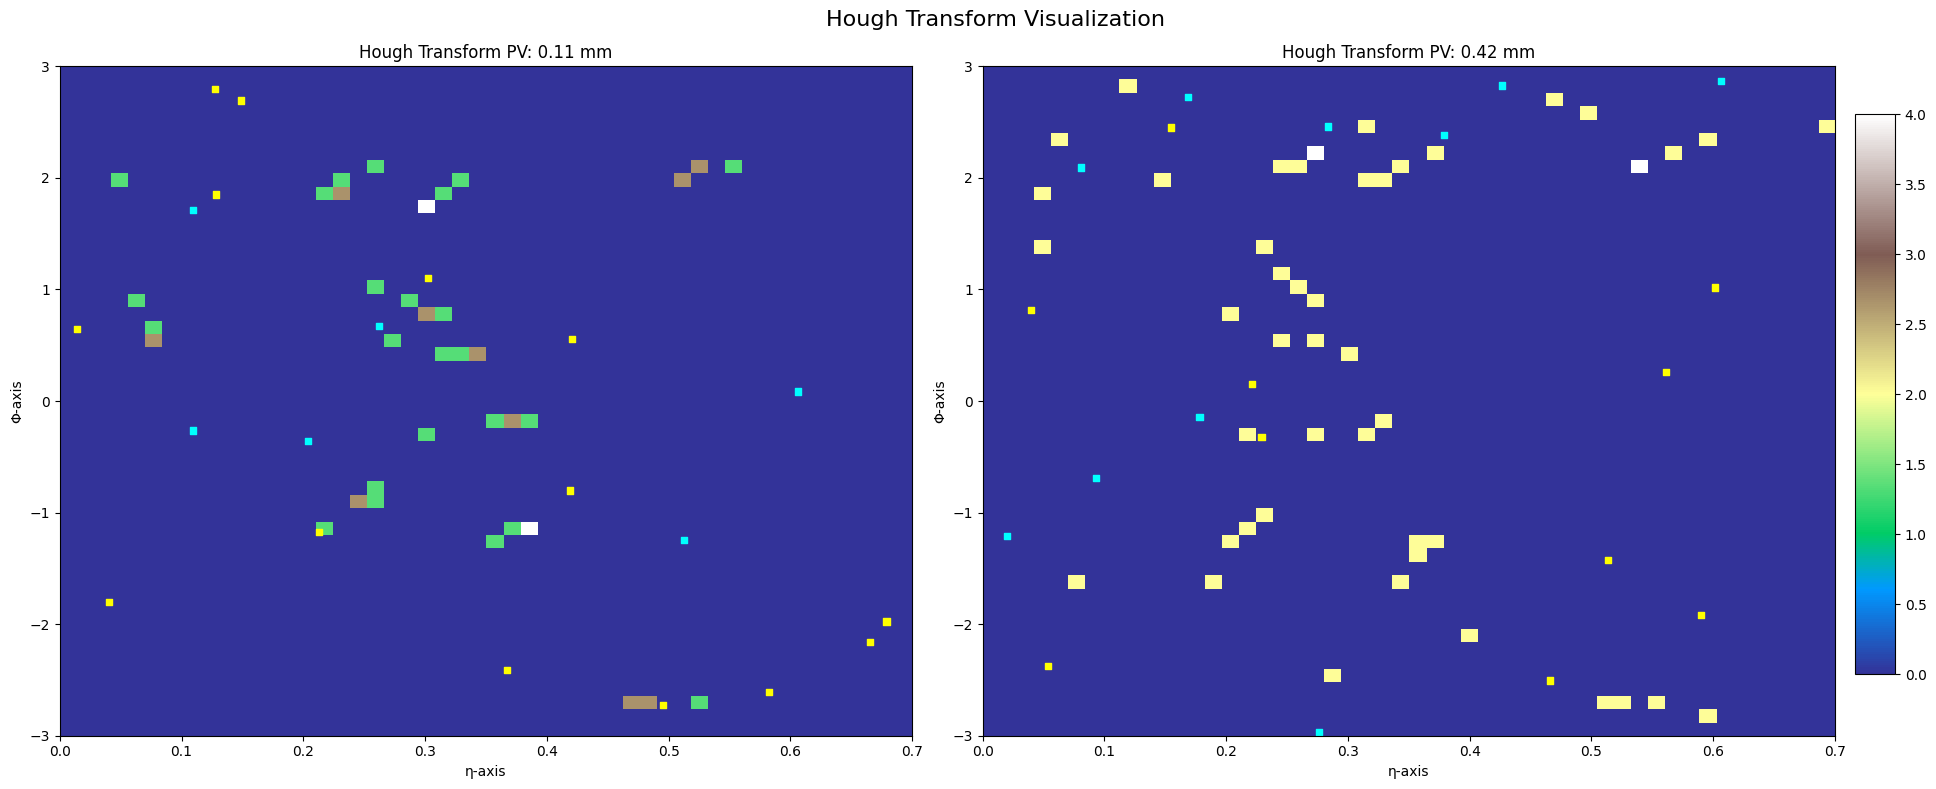

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def hough_transform(cartesian_coords, pv):
    r, theta, phi = cartesian_to_spherical_vectorized(cartesian_coords, pv)
    return theta, phi

# Create a new figure with adjusted size and spacing
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Hough Transform Visualization', fontsize=16)

pvs = [0.11, 0.42]  # Primary vertex positions
colors = ['#00FFFF', '#FFFF00']  # Cyan and Yellow

for idx, (ax, pv) in enumerate(zip([ax1, ax2], pvs)):
    theta_all, phi_all = [], []
    
    for event_coords in cartesian_coords:
        theta, phi = hough_transform(event_coords, (pv, 0, 0))
        theta_all.extend(theta)
        phi_all.extend(phi)
    
    hist, xedges, yedges = np.histogram2d(theta_all, phi_all, bins=(50, 50), range=[[0, 0.7], [-3, 3]])
    
    im = ax.imshow(hist.T, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], 
                   origin='lower', aspect='auto', cmap='terrain')
    
    # Add some random points to simulate the yellow and cyan dots
    np.random.seed(42 + idx)  # For reproducibility
    n_points = 20
    random_theta = np.random.uniform(0, 0.7, n_points)
    random_phi = np.random.uniform(-3, 3, n_points)
    random_colors = np.random.choice(colors, n_points)
    
    ax.scatter(random_theta, random_phi, c=random_colors, s=20, marker='s')
    
    ax.set_xlabel('η-axis')
    ax.set_ylabel('Φ-axis')
    ax.set_title(f'Hough Transform PV: {pv} mm')

# Adjust layout to prevent overlap
plt.tight_layout()

# Add space for colorbars
fig.subplots_adjust(right=0.92)
cbar_ax = fig.add_axes([0.93, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.show()